<a href="https://colab.research.google.com/github/xalo1987/Proyecto_DataAnalysis/blob/main/Archivo_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ruta11 = '/content/drive/My Drive/Colab Notebooks/Text_clasify_dataset/dataset_Tweets_suicida.csv'
df_tweets = pd.read_csv(ruta11)

In [3]:
df_tweets.head(10)

,class,texto_normalizado
0,suicida,ayudi necesitar encontrar salida tristeza cree...
1,suicida,ver destello suicidio autoshamiento zoning out...
2,suicida,concisar terminar intento varios vez intentar ...
3,suicida,slip carrera recaí último proyecto perder sala...
4,suicida,detener amigo odiar amor vida querer tener ver...
5,suicida,pensamiento suicida nuevo caer rutina deprimid...
6,suicida,nadie intentar considerar opinión dónde empeza...
7,suicida,creer morir suicidio pronto vida sufrimiento i...
8,suicida,sonar absolutamente desagradable egoísta terri...
9,suicida,verdadero soledad enfermedad mental empeorar b...


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_tweets['cluster'] = le.fit_transform(df_tweets['class'])
df_tweets.head(5)

,class,texto_normalizado,cluster
0,suicida,ayudi necesitar encontrar salida tristeza cree...,1
1,suicida,ver destello suicidio autoshamiento zoning out...,1
2,suicida,concisar terminar intento varios vez intentar ...,1
3,suicida,slip carrera recaí último proyecto perder sala...,1
4,suicida,detener amigo odiar amor vida querer tener ver...,1


In [4]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.1 MB/s eta 0:00:00


In [8]:
categories = [
    "suicida",
    "no-suicida",
]

In [9]:
df_tweets_dataset = df_tweets[[ 'texto_normalizado' , 'cluster' ]]
df_tweets_dataset.tail()

,texto_normalizado,cluster
84109,bien poder intimidar hacer tarea arte coño irr...,0
84110,temporada final tristeza saber sensación vacío...,0
84111,solo sumar vapor confíar taylor sherman estafa...,0
84112,hacer enamoramiento dibujo especial hacer éxit...,0
84113,prohibir cuenta alternativo subreddit suspende...,0


## 2. Analisis de lo datos

In [10]:
print('Cantidad Datos Suicida : ', df_tweets_dataset[ df_tweets_dataset['cluster']== 1 ].count() )
print('Cantidad Datos No-Suicida : ', df_tweets_dataset[ df_tweets_dataset['cluster']== 0 ].count())

Cantidad Datos Suicida :  texto_normalizado    43371
cluster              43381
dtype: int64
Cantidad Datos No-Suicida :  texto_normalizado    40703
cluster              40733
dtype: int64


# 2. Tokenizacion con Bert

In [11]:
from transformers import BertTokenizer , TFBertTokenizer
PRE_TRAINED_MODEL_NAME =  '/content/drive/My Drive/Colab Notebooks/Text_clasify_dataset/bert-base-spanish-wwm-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
#tokenizerTF = TFBertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME) no funciona

In [12]:
# Texto de entrada
texto = "Hola, ¿cómo estás?"

# Tokenizar el texto
tokens = tokenizer.tokenize(texto)

# Codificar los tokens en números enteros
ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("IDs:", ids)

Tokens: ['Hola', ',', '¿', 'cómo', 'estás', '?']
IDs: [1894, 1017, 1067, 2078, 1844, 1064]


In [13]:
for i,text in enumerate(df_tweets['texto_normalizado'].values):
  if i == 15 or i == 14:
    doc = tokenizer.tokenize(text)
    ids = tokenizer.convert_tokens_to_ids(doc)
    print('   ****    Oracion inicial : \n',text)
    print('   ****    Ids : \n',ids)


   ****    Oracion inicial : 
 cada noche duermo desear nunca despertar publicar cuenta tiro paranoico infierno alguien descubrir quién realmente poder girar ninguno lugar caso confesión sacar pecho entonces todo noche acostar quedar despierto deseo dormir dolor sentir ir hacer dormido sentir encantar harto sentir yo entumecido tiempo veces mejor vez siempre volver intentar dormir demasiado cada oportunidad poder despertar amargamente decepcionado vivo honestamente pensado suicidar él incluso llegar probar ver estante armario caer intentar colgar yo cinturón normal realmente poder decir probablemente peor probablemente necesitar ayuda miedo difícil admitir ambos cosa parte querer pedir ayuda nuevamente resultar último vez terapio ansiedad depresión alrededor primero año secundario dar frío decir ir creer necesitar coraje decir él alguien poder meter yo terapia probablemente necesitar aún así necesitar solo necesitar consejo hacer gracias sentir
   ****    Ids : 
 [1781, 2109, 28674, 21

In [14]:
import time

In [15]:
nm_data = 10000
t_start = time.time()
oraciones_split_bert = []
#largos_ids = []
target_bert = []
count_s = 0
count_Ns = 0
Data_filtrada = []
for i,(dat,tar) in enumerate(zip(df_tweets['texto_normalizado'].values,df_tweets['cluster'].values)):
  try:
    doc = tokenizer.tokenize(dat)
    ids = tokenizer.convert_tokens_to_ids(doc)
    #largos_ids.append(len(ids))
    if (tar == 1 and count_s < nm_data):
      oraciones_split_bert.append(ids)
      target_bert.append(tar)
      Data_filtrada.append( (ids,tar) )
      count_s += 1
    else:
      if (tar == 0 and count_Ns < nm_data):
        oraciones_split_bert.append(ids)
        target_bert.append(tar)
        Data_filtrada.append( (ids,tar) )
        count_Ns += 1
      else:
        if (count_s >= nm_data and  count_Ns >= nm_data):
          break

  except:
    print('Fallo en la iteracion : ',i)
t_end = time.time()
print('El proceso se demoro : ',t_end-t_start)

Fallo en la iteracion :  999
Fallo en la iteracion :  1038
Fallo en la iteracion :  3720
Fallo en la iteracion :  4302
Fallo en la iteracion :  10930
Fallo en la iteracion :  20949
Fallo en la iteracion :  27746
Fallo en la iteracion :  29425
Fallo en la iteracion :  38004
Fallo en la iteracion :  40122
Fallo en la iteracion :  44791
Fallo en la iteracion :  46465
Fallo en la iteracion :  47994
Fallo en la iteracion :  52050
Fallo en la iteracion :  52964
El proceso se demoro :  118.99083256721497


In [16]:
import random
random.shuffle(Data_filtrada)

In [17]:
oraciones_split_bert = []
target_bert = []
for dat in Data_filtrada:
  oraciones_split_bert.append(dat[0])
  target_bert.append(dat[1])


In [18]:
print( len(oraciones_split_bert) , len(target_bert))

20000 20000


In [19]:
def llenar_matriz_con_ceros(lista_original, longitud_maxima):
    # Crea una matriz NumPy llena de ceros con la forma adecuada
    matriz = np.zeros((len(lista_original), longitud_maxima), dtype=int)

    # Rellena la matriz con los valores de la lista original
    for i, sublista in enumerate(lista_original):
        if len(sublista) <= longitud_maxima:
            matriz[i, :len(sublista)] = sublista
        else:
            matriz[i, :] = sublista[:longitud_maxima]

    return matriz

# Tu lista original
lista_original = [[1, 2, 3], [1], [5, 8, 4, 2, 3, 9]]
# Define la longitud máxima deseada
longitud_maxima = 4
# Llama a la función para obtener la matriz resultante
matriz = llenar_matriz_con_ceros(lista_original, longitud_maxima)
print(matriz)

[[1 2 3 0]
 [1 0 0 0]
 [5 8 4 2]]


In [20]:
# Encuentra la longitud máxima de las sublistas
longitud_maxima = 600

# Crea una matriz NumPy llena de ceros con la forma adecuada
oraciones_split_bert_dense = llenar_matriz_con_ceros(oraciones_split_bert, longitud_maxima)

print(oraciones_split_bert_dense.shape)

(20000, 600)


In [21]:
#vectorizer = TfidfVectorizer( sublinear_tf=True, max_df=0.5, min_df=5, stop_words=stop_words)

#X_train = vectorizer.fit_transform(x_train)
#X_test = vectorizer.transform(x_test)

In [22]:
n_prob_test = 0.18
n_prob_val = 0.12

In [23]:
N_data = oraciones_split_bert_dense.shape[0]
N_test = int(n_prob_test*N_data)
N_val = int(n_prob_val*N_data)
N_train = N_data - N_test - N_val

x_train , x_test , x_val = oraciones_split_bert_dense[:N_train] , oraciones_split_bert_dense[N_train:N_train+N_test],  oraciones_split_bert_dense[N_train+N_test:]
y_train , y_test , y_val = target_bert[:N_train] , target_bert[N_train:N_train+N_test] , target_bert[N_train+N_test:]

print( len(x_train) , len(x_test) , len(x_val) )
print( len(y_train) , len(y_test) , len(y_val))

14000 3600 2400
14000 3600 2400


In [24]:
def count_label(label, data):
  count = 0
  for dat in data:
    if dat==label:
      count += 1
  return count

print('Cantidad de label 0 en train : ',count_label(0,y_train))
print('Cantidad de label 1 en train : ',count_label(1,y_train))
print('Cantidad de label 0 en test : ',count_label(0,y_test))
print('Cantidad de label 1 en test : ',count_label(1,y_test))
print('Cantidad de label 0 en val : ',count_label(0,y_val))
print('Cantidad de label 1 en val : ',count_label(1,y_val))

Cantidad de label 0 en train :  7008
Cantidad de label 1 en train :  6992
Cantidad de label 0 en test :  1820
Cantidad de label 1 en test :  1780
Cantidad de label 0 en val :  1172
Cantidad de label 1 en val :  1228


In [26]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV


In [27]:
from sklearn.ensemble import HistGradientBoostingClassifier


In [28]:
clf = HistGradientBoostingClassifier(max_iter=100).fit(x_train, y_train)

              precision    recall  f1-score   support

     suicida       0.79      0.78      0.78      1820
  no-suicida       0.78      0.78      0.78      1780

    accuracy                           0.78      3600
   macro avg       0.78      0.78      0.78      3600
weighted avg       0.78      0.78      0.78      3600



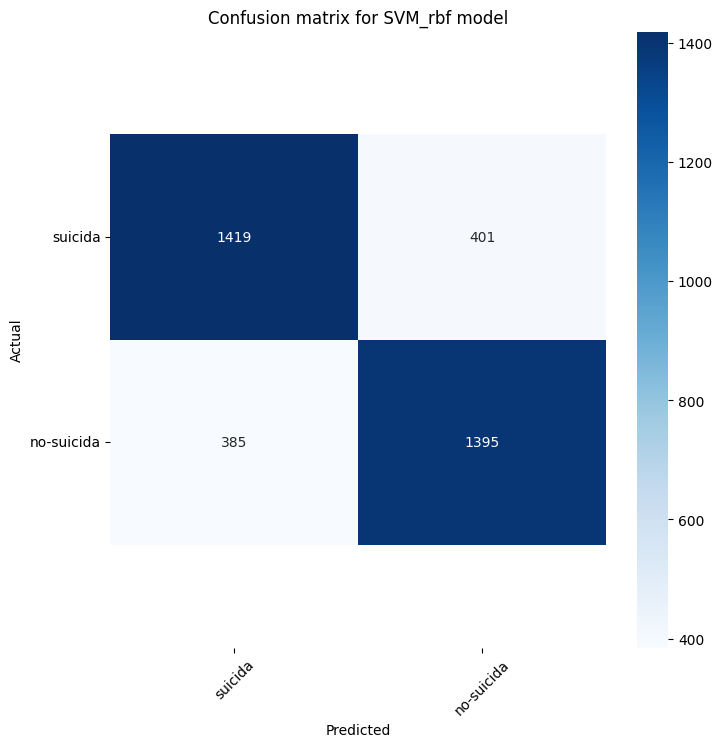

In [29]:
predr_rbf = clf.predict(x_test)
classes = categories
# print classification report
print(classification_report(y_test, predr_rbf , target_names=classes))

cf_matrix_rbf = confusion_matrix(y_test, predr_rbf)

plt.figure(figsize = (8,8))

title = 'Confusion matrix for SVM_rbf model'

# Create a heatmap of the confusion matrix
sns.heatmap(cf_matrix_rbf, annot=True, fmt='.0f', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(title)

# Add legends for the heatmap
bottom, top = plt.ylim()
plt.ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [32]:
gbdt = HistGradientBoostingClassifier(
                                      min_samples_leaf=1,
                                      max_depth=2,
                                      learning_rate=1,
                                      max_iter=1
                                      )
gbdt.fit(x_train, y_train)

HistGradientBoostingClassifier(learning_rate=1, max_depth=2, max_iter=1,
                               min_samples_leaf=1)

              precision    recall  f1-score   support

     suicida       0.72      0.78      0.75      1820
  no-suicida       0.76      0.69      0.72      1780

    accuracy                           0.74      3600
   macro avg       0.74      0.74      0.74      3600
weighted avg       0.74      0.74      0.74      3600



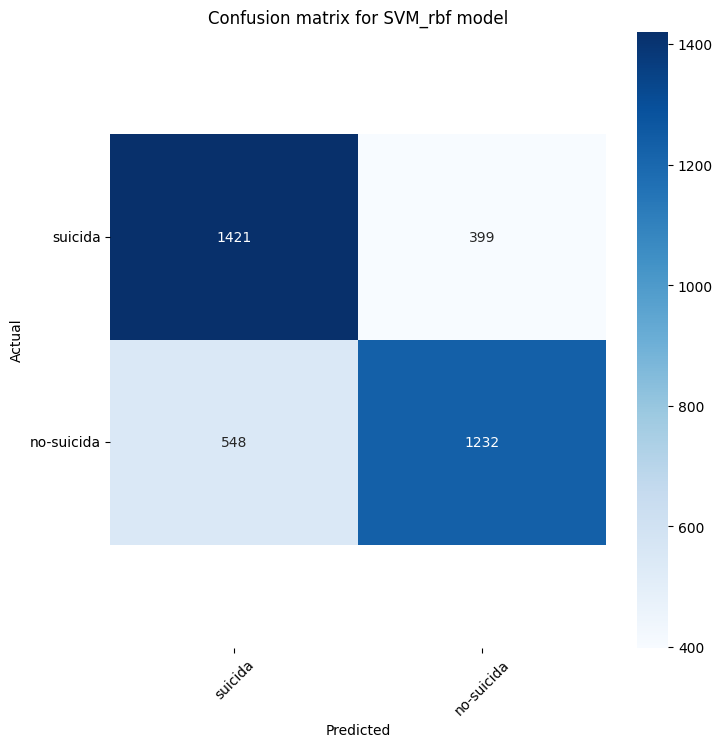

In [33]:
predr_rbf = gbdt.predict(x_test)
classes = categories
# print classification report
print(classification_report(y_test, predr_rbf , target_names=classes))

cf_matrix_rbf = confusion_matrix(y_test, predr_rbf)

plt.figure(figsize = (8,8))

title = 'Confusion matrix for SVM_rbf model'

# Create a heatmap of the confusion matrix
sns.heatmap(cf_matrix_rbf, annot=True, fmt='.0f', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(title)

# Add legends for the heatmap
bottom, top = plt.ylim()
plt.ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(x_train, y_train)

              precision    recall  f1-score   support

     suicida       0.75      0.79      0.77      1820
  no-suicida       0.77      0.74      0.76      1780

    accuracy                           0.76      3600
   macro avg       0.76      0.76      0.76      3600
weighted avg       0.76      0.76      0.76      3600



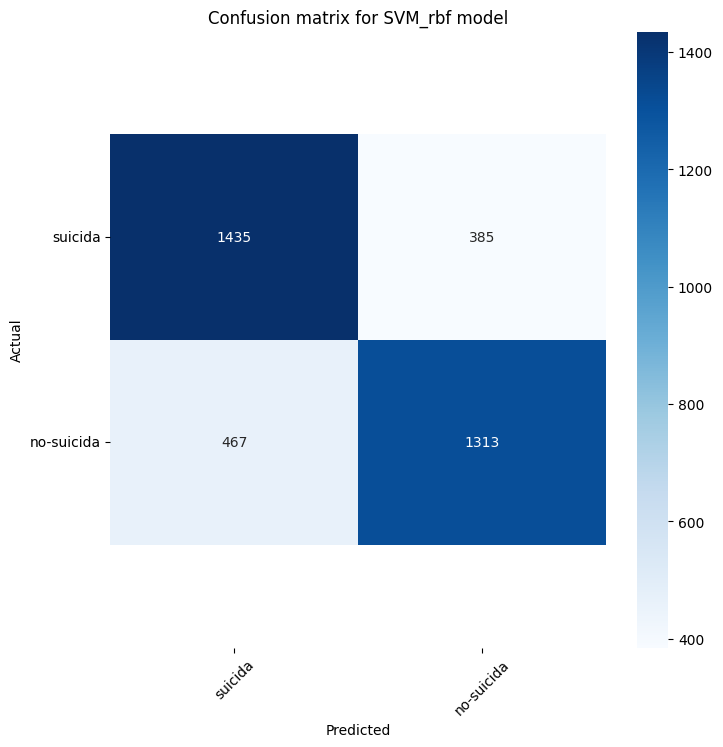

In [36]:
predr_rbf = clf2.predict(x_test)
classes = categories
# print classification report
print(classification_report(y_test, predr_rbf , target_names=classes))

cf_matrix_rbf = confusion_matrix(y_test, predr_rbf)

plt.figure(figsize = (8,8))

title = 'Confusion matrix for SVM_rbf model'

# Create a heatmap of the confusion matrix
sns.heatmap(cf_matrix_rbf, annot=True, fmt='.0f', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Set the axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(title)

# Add legends for the heatmap
bottom, top = plt.ylim()
plt.ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [49]:
def plotting_matrix_conf(clf2,x_test,y_test,categories):
  predr_rbf = clf2.predict(x_test)
  classes = categories
  # print classification report
  print(classification_report(y_test, predr_rbf , target_names=classes))

  cf_matrix_rbf = confusion_matrix(y_test, predr_rbf)

  plt.figure(figsize = (8,8))

  title = 'Confusion matrix for SVM_rbf model'

  # Create a heatmap of the confusion matrix
  sns.heatmap(cf_matrix_rbf, annot=True, fmt='.0f', cmap='Blues', xticklabels=classes, yticklabels=classes)

  # Set the axis labels and title
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(title)

  # Add legends for the heatmap
  bottom, top = plt.ylim()
  plt.ylim(bottom + 0.5, top - 0.5)
  plt.xticks(rotation=45)
  plt.yticks(rotation=0)
  plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf3 = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
scores3 = cross_val_score(clf3, x_train, y_train, cv=5)

In [45]:
clf4 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores4 = cross_val_score(clf4,  x_train, y_train, cv=5)

In [46]:
clf5 = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
scores5 = cross_val_score(clf5, x_train, y_train, cv=5)

In [47]:
print(scores3.mean())
print(scores4.mean())
print(scores5.mean())

0.6515000000000001
0.7284285714285714
0.7182857142857142


In [50]:
plotting_matrix_conf(clf3,x_test,y_test,categories)

NotFittedError: ignored